<a href="https://colab.research.google.com/github/Hemn-Khdr/intro-ml-course-winter2025/blob/Datathon%233/H__Datathon_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install scikit-optimize

# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from google.colab import drive
from statsmodels.imputation.mice import MICEData
from sklearn.preprocessing import StandardScaler

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from google.colab import drive
from statsmodels.imputation.mice import MICEData
from sklearn.preprocessing import StandardScaler

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 10.1 MB/s eta 0:00:00


In [10]:
from google.colab import files
import io
uploaded = files.upload()

Saving Datathon #3 Dataset - HAD7001.csv to Datathon #3 Dataset - HAD7001.csv


Missing values per column:
 encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

Missing values per row:
 0         60
1         19
2        102
3         48
4        115
        ... 
91708     41
91709     58
91710     77
91711    115
91712     65
Length: 91713, dtype: int64

Rows with any missing data:
        encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   

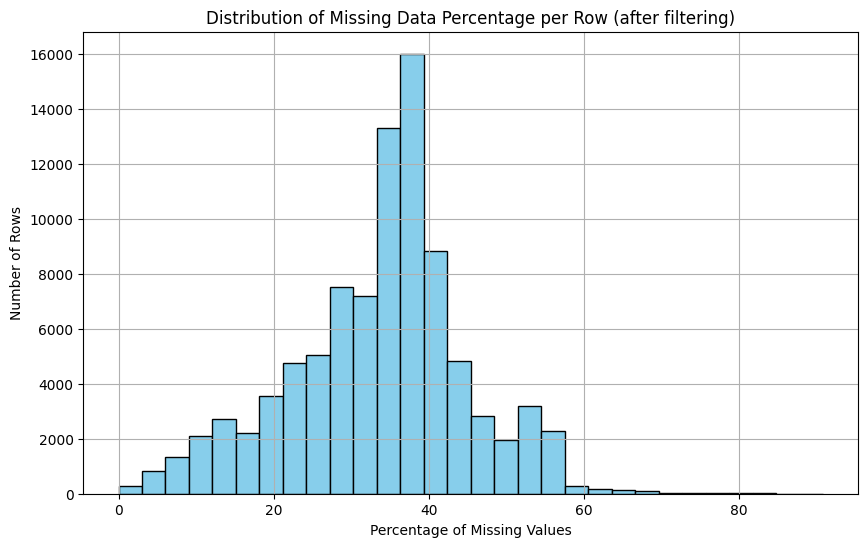

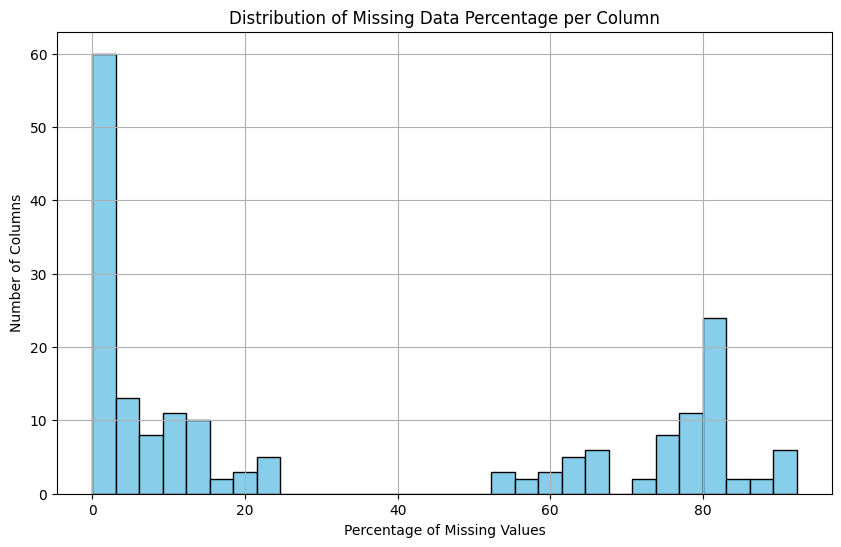

In [11]:
# Exploration of missing values
import pandas as pd

# Load the dataset
file_path = "Datathon #3 Dataset - HAD7001.csv"
df = pd.read_csv(file_path)

# Check for missing values in each column
missing_values_col = df.isnull().sum()
print("Missing values per column:\n", missing_values_col)

# Check for missing values in each row
missing_values_row = df.isnull().sum(axis=1)
print("\nMissing values per row:\n", missing_values_row)

# Explore rows with missing values
rows_with_missing_data = df[df.isnull().any(axis=1)]
print("\nRows with any missing data:\n", rows_with_missing_data)

# Calculate the percentage of missing values in each row
missing_percentage_row = df.isnull().sum(axis=1) / len(df.columns) * 100

# Percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)

# Histogram of missing values in each row
missing_percentage_row_filtered = df.isnull().sum(axis=1) / len(df.columns) * 100
plt.figure(figsize=(10, 6))
plt.hist(missing_percentage_row_filtered, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Missing Data Percentage per Row (after filtering)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Rows')
plt.grid(True)
plt.show()

# Histogram of missing values in each column
plt.figure(figsize=(10, 6))
plt.hist(missing_percentage, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Missing Data Percentage per Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Columns')
plt.grid(True)
plt.show()

Number of rows with over 30% missing values:
 62598

Shape of the DataFrame after removing rows:
 (29115, 186)


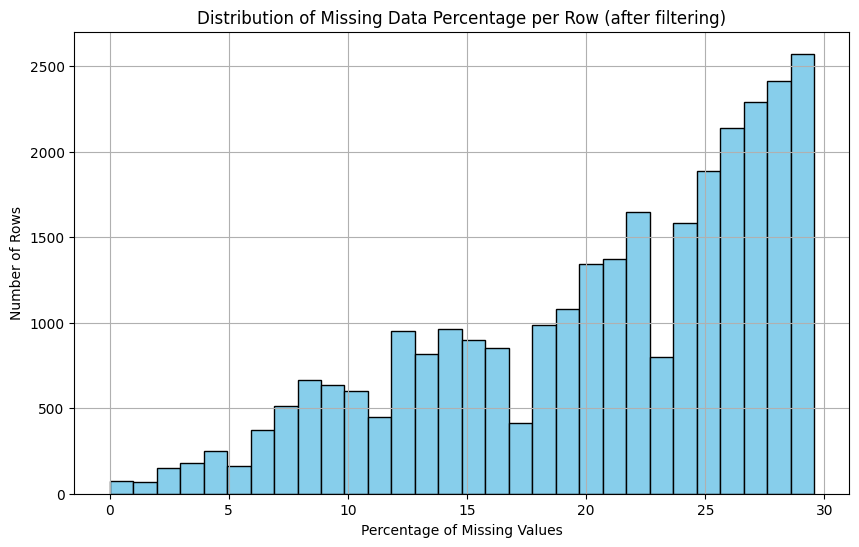

In [12]:
# Exclude rows with over 30% missing data

# Calculate the percentage of missing values in each row
missing_percentage_row = df.isnull().sum(axis=1) / len(df.columns) * 100

# Identify rows with more than 90% missing values
rows_to_exclude = missing_percentage_row[missing_percentage_row > 30].index

# Drop the identified rows from the DataFrame
df = df.drop(index=rows_to_exclude)

# Print some info
print("Number of rows with over 30% missing values:\n", len(rows_to_exclude))
print("\nShape of the DataFrame after removing rows:\n", df.shape)

# Histogram of missing values in each row after removal
missing_percentage_row = df.isnull().sum(axis=1) / len(df.columns) * 100
plt.figure(figsize=(10, 6))
plt.hist(missing_percentage_row, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Missing Data Percentage per Row (after filtering)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Rows')
plt.grid(True)
plt.show()

In [13]:
#Remove uneeded variables

# Exclude ID variables except hospital ID used for splitting
df = df.drop(columns=['patient_id', 'encounter_id', 'icu_id'])

# Exclude APACHE variables
df = df.loc[:, ~df.columns.str.contains('apache', case=False)]

# Exclude non-clinical variables with potential variability by site
df = df.drop(columns=['hospital_admit_source', 'icu_admit_source', 'icu_stay_type','icu_type', 'readmission_status', 'elective_surgery'])

# View input columns
df.head()

,hospital_id,hospital_death,age,bmi,ethnicity,gender,height,pre_icu_los_days,weight,d1_diasbp_invasive_max,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,81,0,77.0,27.42,Caucasian,F,160.0,0.927778,70.2,NaN,...,51.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,118,0,81.0,22.64,Caucasian,F,165.1,0.000694,61.7,62.0,...,337.0,337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,83,0,59.0,57.45,Caucasian,F,165.1,0.000694,156.6,107.0,...,370.0,370.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,118,1,45.0,NaN,Caucasian,M,170.2,0.009028,NaN,64.0,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,118,0,50.0,25.71,NaN,M,175.3,0.060417,79.0,74.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print(df.shape)

# Identify categorical variables (including binary 0,1 variables)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
binary_cols = [col for col in df.select_dtypes(include=['number']).columns if df[col].nunique() == 2]

# Summarize categorical variables (counts and percentages)
for col in categorical_cols + binary_cols:
    print(f"\nSummary for categorical variable: {col}")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(summary_df)

# Identify continuous variables (excluding binary 0,1 variables)
continuous_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in binary_cols]

# Summarize continuous variables
continuous_cols = df.select_dtypes(include=['number']).columns
for col in continuous_cols:
    print(f"\nSummary for continuous variable: {col}")
    print(df[col].describe())


(29115, 145)

Summary for categorical variable: ethnicity
                  Count  Percentage
ethnicity                          
Caucasian         22811   79.122442
African American   2720    9.434617
Other/Unknown      1407    4.880333
Hispanic           1240    4.301075
Asian               344    1.193202
Native American     308    1.068332

Summary for categorical variable: gender
        Count  Percentage
gender                   
M       16623    57.10605
F       12486    42.89395

Summary for categorical variable: hospital_death
                Count  Percentage
hospital_death                   
0               24960   85.729006
1                4155   14.270994

Summary for categorical variable: aids
      Count  Percentage
aids                   
0.0   29064    99.90032
1.0      29     0.09968

Summary for categorical variable: cirrhosis
           Count  Percentage
cirrhosis                   
0.0        28526   98.051078
1.0          567    1.948922

Summary for categorical 

4.FEATURE ENGINEERING

In [15]:
# One-hot encode categorical features except ethnicity which will not be used for prediction (only for subgroup)
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('ethnicity')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# View input columns
df.head()

,hospital_id,hospital_death,age,bmi,ethnicity,height,pre_icu_los_days,weight,d1_diasbp_invasive_max,d1_diasbp_invasive_min,...,h1_pao2fio2ratio_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,gender_M
1,81,0,77.0,27.42,Caucasian,160.0,0.927778,70.2,NaN,NaN,...,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
3,118,0,81.0,22.64,Caucasian,165.1,0.000694,61.7,62.0,30.0,...,337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
6,83,0,59.0,57.45,Caucasian,165.1,0.000694,156.6,107.0,65.0,...,370.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
8,118,1,45.0,NaN,Caucasian,170.2,0.009028,NaN,64.0,52.0,...,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9,118,0,50.0,25.71,NaN,175.3,0.060417,79.0,74.0,57.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


5.DATA SPLITTING

In [16]:
# Get unique hospital IDs and shuffle them randomly
unique_hospitals = df['hospital_id'].unique()
np.random.seed(42)  # For reproducibility
np.random.shuffle(unique_hospitals)

# Initialize counters
train_hospitals = []
test_hospitals = []
train_count = 0
total_patients = len(df)

# Iteratively add hospitals to training set until ~70% of patients are included
for hospital in unique_hospitals:
    hospital_patient_count = len(df[df['hospital_id'] == hospital])

    # Check if adding this hospital exceeds 70%
    if train_count + hospital_patient_count <= 0.7 * total_patients:
        train_hospitals.append(hospital)
        train_count += hospital_patient_count
    else:
        test_hospitals.append(hospital)

# Step 4: Create training and testing sets
train_df = df[df['hospital_id'].isin(train_hospitals)]
test_df = df[df['hospital_id'].isin(test_hospitals)]

# Step 5: Separate features and target
X_train = train_df.drop(columns=['hospital_death', 'ethnicity', 'hospital_id']) #does not include ethnicity as a feature due to concerns for bias and lack of biological plausibility
y_train = train_df['hospital_death']
X_test = test_df.drop(columns=['hospital_death', 'ethnicity', 'hospital_id'])
y_test = test_df['hospital_death']

# Check the splits
print(f"Total patients: {total_patients}")
print(f"Training patients: {len(X_train)} ({len(X_train) / total_patients:.2%})")
print(f"Testing patients: {len(X_test)} ({len(X_test) / total_patients:.2%})")
print(f"Number of training hospitals: {len(train_hospitals)}")
print(f"Number of testing hospitals: {len(test_hospitals)}")

# View data
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

Total patients: 29115
Training patients: 20354 (69.91%)
Testing patients: 8761 (30.09%)
Number of training hospitals: 128
Number of testing hospitals: 15


,age,bmi,height,pre_icu_los_days,weight,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,...,h1_pao2fio2ratio_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,gender_M
1,77.0,27.420000,160.0,0.927778,70.2,NaN,NaN,95.0,31.0,95.0,...,51.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
6,59.0,57.450000,165.1,0.000694,156.6,107.0,65.0,76.0,68.0,76.0,...,370.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
16,30.0,23.383178,193.0,0.240972,87.1,NaN,NaN,87.0,51.0,87.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
27,79.0,23.408979,149.9,0.009028,52.6,90.0,64.0,104.0,68.0,104.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
31,68.0,27.560503,172.7,0.005556,82.2,83.0,40.0,80.0,51.0,80.0,...,233.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,True


,hospital_death
1,0
6,0
16,0
27,0
31,0


,age,bmi,height,pre_icu_los_days,weight,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,...,h1_pao2fio2ratio_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,gender_M
3,81.0,22.640000,165.1,0.000694,61.7,62.0,30.0,48.0,42.0,48.0,...,337.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
8,45.0,NaN,170.2,0.009028,NaN,64.0,52.0,65.0,59.0,65.0,...,92.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9,50.0,25.710000,175.3,0.060417,79.0,74.0,57.0,83.0,48.0,83.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
19,39.0,37.010278,177.8,5.163889,117.0,78.0,36.0,78.0,36.0,NaN,...,228.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
23,87.0,21.963763,180.3,5.046528,71.4,NaN,NaN,88.0,65.0,88.0,...,275.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


,hospital_death
3,0
8,1
9,0
19,0
23,0


6.MICE FOR MISSING DATA (DDN SINGLE DATASET)

In [18]:
# Impute missing values in X_train using MICE
mice_model_train = MICEData(X_train)
X_train = mice_model_train.data

# Impute missing values in X_test using MICE
mice_model_test = MICEData(X_test)
X_test = mice_model_test.data

# Example: remove 'hospital_id' and 'hospital_death' from continuous_cols
continuous_cols = [col for col in continuous_cols if col in X_train.columns]

print(X_train.columns)
print(continuous_cols)


Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       ...
       'h1_pao2fio2ratio_min', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'gender_M'],
      dtype='object', length=142)
['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Initialize the MICE imputer
mice_imputer = IterativeImputer(random_state=0, max_iter=5)

#Fit the imputer on the training data (no data leakage)
mice_imputer.fit(X_train[continuous_cols])

#Transform the training and test sets
X_train[continuous_cols] = mice_imputer.transform(X_train[continuous_cols])
X_test[continuous_cols] = mice_imputer.transform(X_test[continuous_cols])

XGBOOST MODEL

In [20]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the parameter grid for Bayesian optimization
param_grid = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'n_estimators': Integer(50, 200),
    'min_child_weight': Integer(1,10)
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Initialize BayesSearchCV
opt = BayesSearchCV(
    xgb_model,
    param_grid,
    n_iter=32,  # Number of iterations
    cv=5,       # Cross-validation folds
    n_jobs=-1,    # Use all available CPU cores
    random_state=42
)

# Perform Bayesian optimization
opt.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters:", opt.best_params_)
print("Best cross-validation score:", opt.best_score_)

# Evaluate the best model on training and test sets
best_model = opt.best_estimator_

# Training accuracy
y_train_pred = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {accuracy_train:.4f}")

# Testing accuracy
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {accuracy_test:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: OrderedDict([('colsample_bytree', 0.5041310560512362), ('learning_rate', 0.07684890736094603), ('max_depth', 10), ('min_child_weight', 9), ('n_estimators', 200), ('subsample', 0.8330276921679075)])
Best cross-validation score: 0.888031543300519
Accuracy on training set: 0.9783
Accuracy on test set: 0.8865



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7554
           1       0.67      0.35      0.46      1207

    accuracy                           0.89      8761
   macro avg       0.79      0.66      0.70      8761
weighted avg       0.87      0.89      0.87      8761


Confusion Matrix for Best Model (20% Test Size):
[[7347  207]
 [ 787  420]]


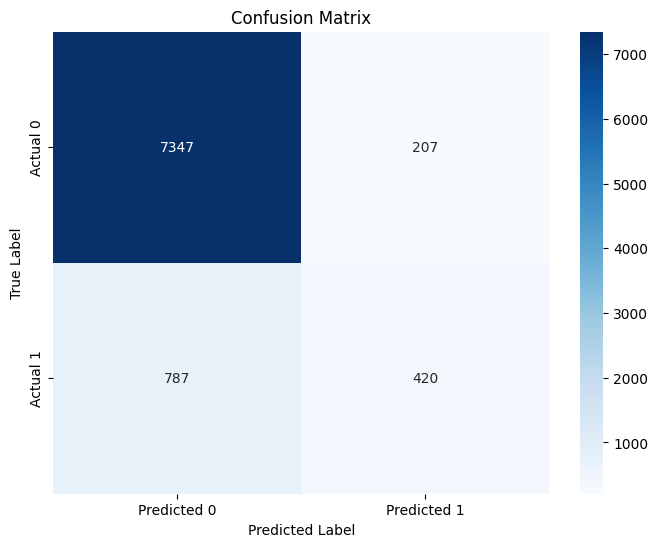

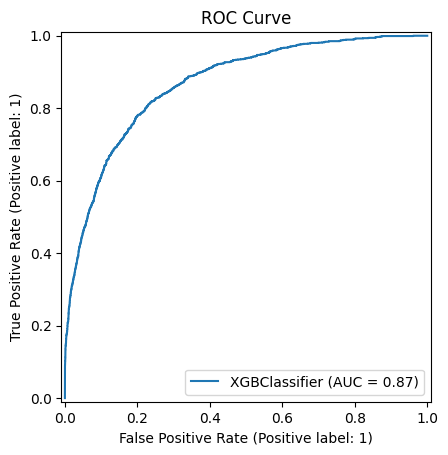

In [21]:
# Further evaluation of models
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Further evaluation metrics:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Visualize confusion matrix:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Best Model (20% Test Size):")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate ROC curve
RocCurveDisplay.from_estimator(opt.best_estimator_, X_test, y_test)
plt.title("ROC Curve")
plt.show()

improvement

Computed Scale Pos Weight: 5.904341926729987


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: OrderedDict([('colsample_bytree', 0.6), ('gamma', 0.0), ('learning_rate', 0.07943288669030178), ('max_depth', 10), ('min_child_weight', 1), ('n_estimators', 150), ('scale_pos_weight', 5.188757319510077), ('subsample', 0.6)])
Best cross-validation score: 0.9097437665172928


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on training set: 0.9995
Accuracy on test set: 0.8844
Optimal Decision Threshold: 0.2169131636619568

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7554
           1       0.48      0.61      0.54      1207

    accuracy                           0.85      8761
   macro avg       0.71      0.75      0.73      8761
weighted avg       0.87      0.85      0.86      8761


Confusion Matrix:
[[6748  806]
 [ 468  739]]


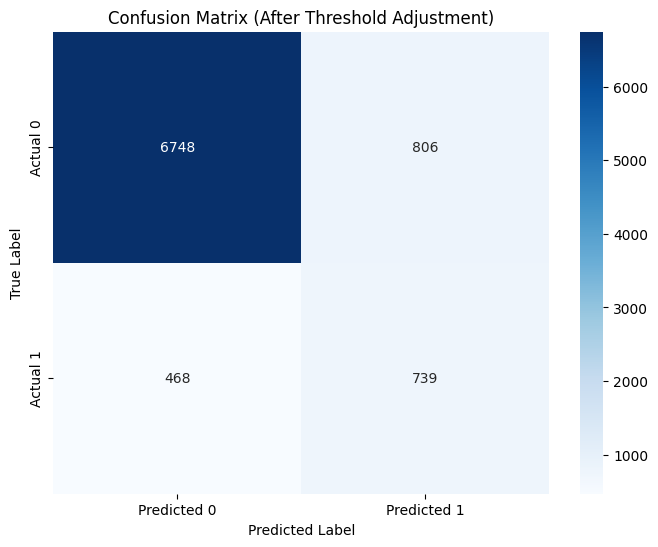

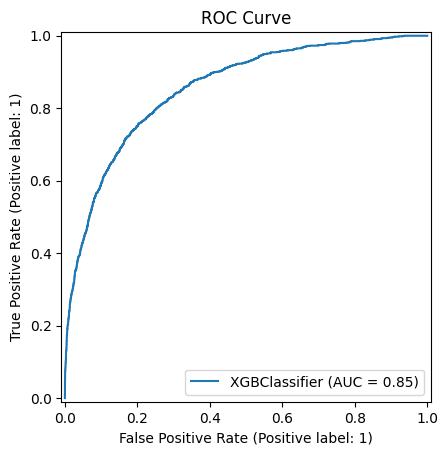

In [23]:
# Install missing dependencies if needed
!pip install xgboost scikit-optimize imbalanced-learn --quiet

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skopt import BayesSearchCV
from skopt.space import Real, Integer
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, precision_recall_curve
from imblearn.over_sampling import SMOTE

# 1️⃣ **Reduce Data for Faster Bayesian Optimization (Train on 50%)**
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train, random_state=42)

# 2️⃣ **Apply SMOTE to Balance the Training Data**
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_sample, y_train_sample)

# 3️⃣ **Compute Class Weight (`scale_pos_weight`)**
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Computed Scale Pos Weight: {scale_pos_weight}")

# 4️⃣ **Define Faster Bayesian Optimization Parameter Grid**
param_grid = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'n_estimators': Integer(50, 150),  # Reduced range
    'min_child_weight': Integer(1, 8),  # Slightly lower range
    'gamma': Real(0, 4),  # Prevent overfitting
    'scale_pos_weight': Real(scale_pos_weight * 0.8, scale_pos_weight * 1.2)  # Dynamic weight range
}

# 5️⃣ **Fast Bayesian Optimization with Fewer Iterations**
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

opt = BayesSearchCV(
    xgb_model,
    param_grid,
    n_iter=15,  # Reduced iterations for speed
    cv=3,  # Reduce cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Train Bayesian optimization on the smaller dataset
opt.fit(X_train_balanced, y_train_balanced)

# 6️⃣ **Retrieve Best Parameters & Train on Full Dataset**
print("Best parameters:", opt.best_params_)
print("Best cross-validation score:", opt.best_score_)

# Train final model on full dataset
best_model = xgb.XGBClassifier(**opt.best_params_, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
best_model.fit(X_train, y_train)

# 7️⃣ **Evaluate Performance**
y_train_pred = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {accuracy_train:.4f}")

y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {accuracy_test:.4f}")

# 8️⃣ **Find the Optimal Decision Threshold**
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
best_threshold = thresholds[np.argmax(precision * recall)]
print(f"Optimal Decision Threshold: {best_threshold}")

# Apply the new threshold
y_test_adjusted = (y_probs >= best_threshold).astype(int)

# 9️⃣ **Final Model Evaluation**
print("\nClassification Report:")
print(classification_report(y_test, y_test_adjusted))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_adjusted)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (After Threshold Adjustment)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 10️⃣ **ROC Curve**
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()
